aws s3 cp s3://1000genomes/phase3/data/HG02790/cg_data/HG02790_blood_SRR833683.wgs.COMPLETE_GENOMICS.20130401.snps_indels_svs_meis.high_coverage.genotypes.vcf.gz ./

aws s3 cp s3://1000genomes/phase3/data/HG02791/cg_data/HG02791_blood_SRR833690.wgs.COMPLETE_GENOMICS.20130401.snps_indels_svs_meis.high_coverage.genotypes.vcf.gz ./

For no reason other than they are the last 2 on my list, let's use these 2 samples.

We'll select all of the C-T transitions in chromosome 1 and compare.

In [1]:
#!zcat HG02790_blood_SRR833683.wgs.COMPLETE_GENOMICS.20130401.snps_indels_svs_meis.high_coverage.genotypes.vcf.gz | awk -F"\t" '($1 == 1 && $4 == "C" && $5 == "T"){print $2}' > HG02790.chr1.C-T.txt

In [2]:
#!zcat HG02791_blood_SRR833690.wgs.COMPLETE_GENOMICS.20130401.snps_indels_svs_meis.high_coverage.genotypes.vcf.gz | awk -F"\t" '($1 == 1 && $4 == "C" && $5 == "T"){print $2}' > HG02791.chr1.C-T.txt

In [3]:
!head data/HG02790.chr1.C-T.txt

72787
102138
128798
254209
564513
565286
565406
565591
565976
566130


In [4]:
!head data/HG02791.chr1.C-T.txt

56485
72787
128798
258930
548491
565286
565406
565591
565976
566130


In [5]:
import numpy as np
from numpy import genfromtxt
HG02790 = genfromtxt('data/HG02790.chr1.C-T.txt', delimiter=',')
HG02791 = genfromtxt('data/HG02791.chr1.C-T.txt', delimiter=',')

In [6]:
HG02790[0:10]

array([ 72787., 102138., 128798., 254209., 564513., 565286., 565406.,
       565591., 565976., 566130.])

In [7]:
HG02791[0:10]

array([ 56485.,  72787., 128798., 258930., 548491., 565286., 565406.,
       565591., 565976., 566130.])

In [8]:
len(HG02790), len(HG02791)

(46747, 47171)

In [9]:
import matplotlib.pyplot as plt

In [10]:
HG02790_hist, HG02790_bin_edges = np.histogram(HG02790, bins=100)
HG02791_hist, HG02791_bin_edges = np.histogram(HG02791, bins=100)

In [11]:
HG02790_bin_edges

array([7.27870000e+04, 2.56430290e+06, 5.05581880e+06, 7.54733470e+06,
       1.00388506e+07, 1.25303665e+07, 1.50218824e+07, 1.75133983e+07,
       2.00049142e+07, 2.24964301e+07, 2.49879460e+07, 2.74794619e+07,
       2.99709778e+07, 3.24624937e+07, 3.49540096e+07, 3.74455255e+07,
       3.99370414e+07, 4.24285573e+07, 4.49200732e+07, 4.74115891e+07,
       4.99031050e+07, 5.23946209e+07, 5.48861368e+07, 5.73776527e+07,
       5.98691686e+07, 6.23606845e+07, 6.48522004e+07, 6.73437163e+07,
       6.98352322e+07, 7.23267481e+07, 7.48182640e+07, 7.73097799e+07,
       7.98012958e+07, 8.22928117e+07, 8.47843276e+07, 8.72758435e+07,
       8.97673594e+07, 9.22588753e+07, 9.47503912e+07, 9.72419071e+07,
       9.97334230e+07, 1.02224939e+08, 1.04716455e+08, 1.07207971e+08,
       1.09699487e+08, 1.12191002e+08, 1.14682518e+08, 1.17174034e+08,
       1.19665550e+08, 1.22157066e+08, 1.24648582e+08, 1.27140098e+08,
       1.29631614e+08, 1.32123130e+08, 1.34614646e+08, 1.37106162e+08,
      

In [12]:
HG02791_bin_edges

array([5.64850000e+04, 2.54797983e+06, 5.03947466e+06, 7.53096949e+06,
       1.00224643e+07, 1.25139592e+07, 1.50054540e+07, 1.74969488e+07,
       1.99884436e+07, 2.24799385e+07, 2.49714333e+07, 2.74629281e+07,
       2.99544230e+07, 3.24459178e+07, 3.49374126e+07, 3.74289075e+07,
       3.99204023e+07, 4.24118971e+07, 4.49033919e+07, 4.73948868e+07,
       4.98863816e+07, 5.23778764e+07, 5.48693713e+07, 5.73608661e+07,
       5.98523609e+07, 6.23438558e+07, 6.48353506e+07, 6.73268454e+07,
       6.98183402e+07, 7.23098351e+07, 7.48013299e+07, 7.72928247e+07,
       7.97843196e+07, 8.22758144e+07, 8.47673092e+07, 8.72588040e+07,
       8.97502989e+07, 9.22417937e+07, 9.47332885e+07, 9.72247834e+07,
       9.97162782e+07, 1.02207773e+08, 1.04699268e+08, 1.07190763e+08,
       1.09682258e+08, 1.12173752e+08, 1.14665247e+08, 1.17156742e+08,
       1.19648237e+08, 1.22139732e+08, 1.24631226e+08, 1.27122721e+08,
       1.29614216e+08, 1.32105711e+08, 1.34597206e+08, 1.37088701e+08,
      

Ok, so this won't work. The bin edges are automatically computed based on max and min of each set so no go. 
Need to explicitly set them so that they are the same. Let's use the min min and the max max.

In [13]:
HG02790.min(), HG02790.max(), HG02791.min(), HG02791.max()

(72787.0, 249224377.0, 56485.0, 249205968.0)

In [14]:
max=np.array(HG02790.max(), HG02791.max()).max()
max

249224377.0

In [15]:
min=np.array(HG02790.min(), HG02791.min()).min()
min

72787.0

In [16]:
HG02790_hist, HG02790_bin_edges = np.histogram(HG02790, bins=100, range=(min,max))
HG02791_hist, HG02791_bin_edges = np.histogram(HG02791, bins=100, range=(min,max))

In [17]:
print(plt.rcParams["figure.figsize"])
plt.rcParams["figure.figsize"] = [16.0,4.0]
print(plt.rcParams["figure.figsize"])

[6.0, 4.0]
[16.0, 4.0]


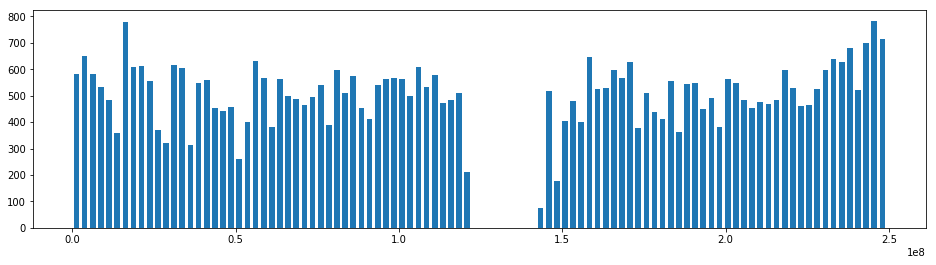

In [18]:
width = 0.7 * (HG02790_bin_edges[1] - HG02790_bin_edges[0])
center = (HG02790_bin_edges[:-1] + HG02790_bin_edges[1:]) / 2
plt.bar(center, HG02790_hist, align='center', width=width)
plt.show()

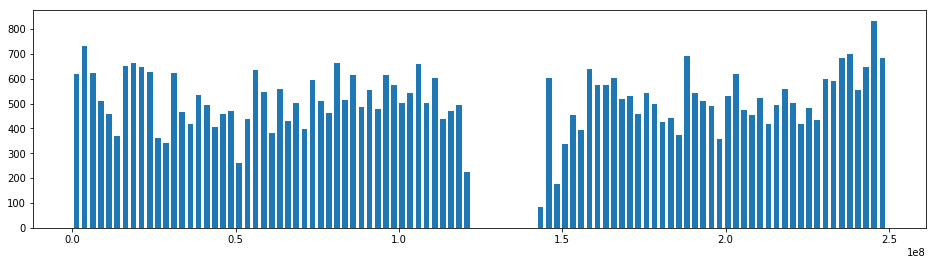

In [19]:
width = 0.7 * (HG02791_bin_edges[1] - HG02791_bin_edges[0])
center = (HG02791_bin_edges[:-1] + HG02791_bin_edges[1:]) / 2
plt.bar(center, HG02791_hist, align='center', width=width)
plt.show()

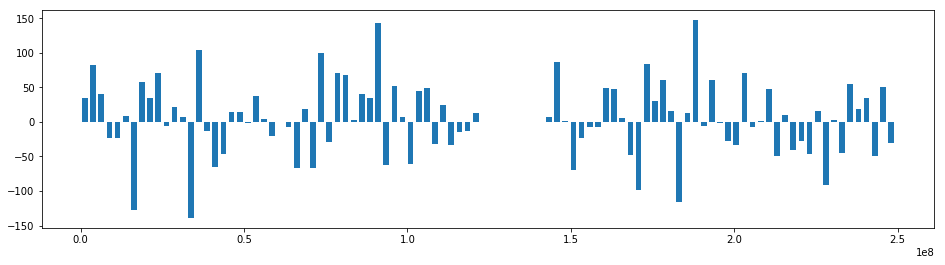

In [20]:
hist_diff = HG02791_hist - HG02790_hist
width = 0.7 * (HG02791_bin_edges[1] - HG02791_bin_edges[0])
center = (HG02791_bin_edges[:-1] + HG02791_bin_edges[1:]) / 2
plt.bar(center, hist_diff, align='center', width=width)
plt.show()

Higher resolution?

In [21]:
HG02790_hist, HG02790_bin_edges = np.histogram(HG02790, bins=1000, range=(min,max))
HG02791_hist, HG02791_bin_edges = np.histogram(HG02791, bins=1000, range=(min,max))

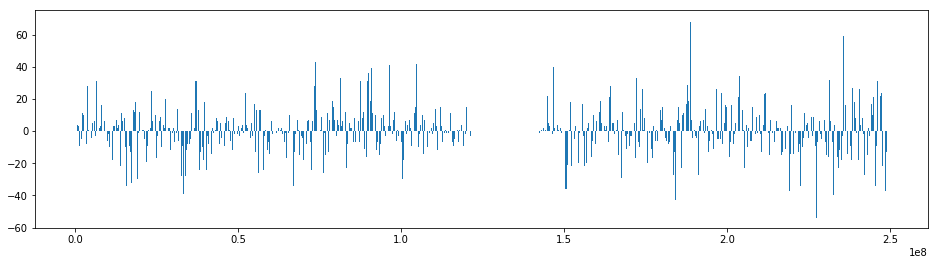

In [22]:
hist_diff = HG02791_hist - HG02790_hist
width = 0.7 * (HG02791_bin_edges[1] - HG02791_bin_edges[0])
center = (HG02791_bin_edges[:-1] + HG02791_bin_edges[1:]) / 2
plt.bar(center, hist_diff, align='center', width=width)
plt.show()

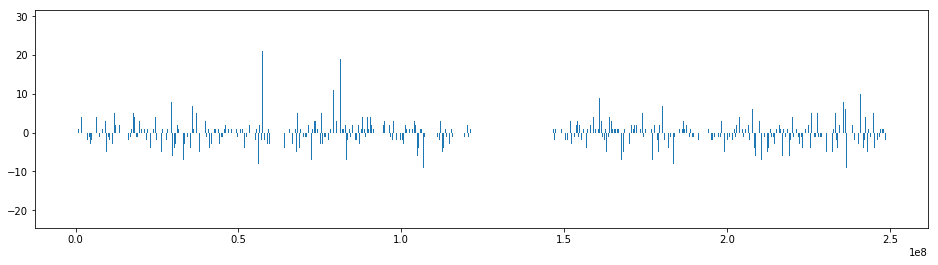

In [23]:
HG02790_hist, HG02790_bin_edges = np.histogram(HG02790, bins=10000, range=(min,max))
HG02791_hist, HG02791_bin_edges = np.histogram(HG02791, bins=10000, range=(min,max))
hist_diff = HG02791_hist - HG02790_hist
width = 0.7 * (HG02791_bin_edges[1] - HG02791_bin_edges[0])
center = (HG02791_bin_edges[:-1] + HG02791_bin_edges[1:]) / 2
plt.bar(center, hist_diff, align='center', width=width)
plt.show()

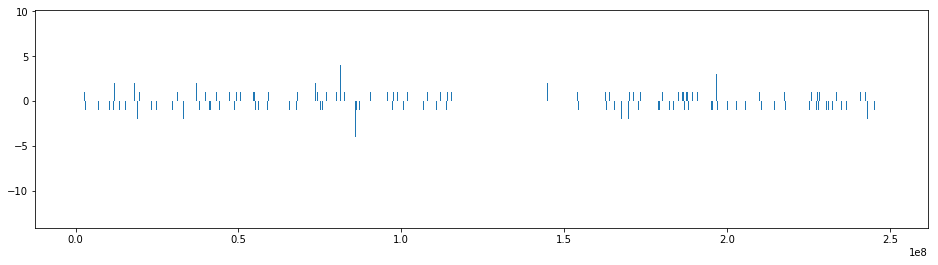

In [24]:
HG02790_hist, HG02790_bin_edges = np.histogram(HG02790, bins=100000, range=(min,max))
HG02791_hist, HG02791_bin_edges = np.histogram(HG02791, bins=100000, range=(min,max))
hist_diff = HG02791_hist - HG02790_hist
width = 0.7 * (HG02791_bin_edges[1] - HG02791_bin_edges[0])
center = (HG02791_bin_edges[:-1] + HG02791_bin_edges[1:]) / 2
plt.bar(center, hist_diff, align='center', width=width)
plt.show()